* CS6243, EE4463, EE5573
* Team 13 - Kosi Atupulazi, Ellen Ojo, Rob Grau
* April 11, 2025
* Homework 3

##Problem 1, Task 1##

In [374]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [375]:
# load dataset
from sklearn.datasets import fetch_california_housing
housing_all = fetch_california_housing(as_frame=True)
print(housing_all.data.shape)

(20640, 8)


In [376]:
# create Pandas dataframe to ease data manipulation
housing_df_data = pd.DataFrame(housing_all.data)
housing_df_target = pd.DataFrame(housing_all.target)
# just get medinc
housing_df_medinc = housing_df_data.loc[:, 'MedInc']

In [377]:
# write split data function
def splitData(x, y, train_size):
  test_end_size = train_size + 5000
  if train_size > 15640:
    printf("train_size must be less than 15640")
    return;
  # concatenate x and y so they can be shuffled w/o losing relationship.
  data_df_xy = pd.concat([housing_df_medinc, housing_df_target], axis=1)
  # shuffle data
  shuf_data_df_xy = data_df_xy.sample(frac=1, random_state=42)
  shuf_data_df_xy = shuf_data_df_xy.reset_index(drop=True)
  # split back into x and y arrays
  data_df_x = shuf_data_df_xy.loc[:, 'MedInc']
  data_df_y = shuf_data_df_xy.loc[:, 'MedHouseVal']

  # Split at train_size
  train_df_x = data_df_x[:train_size]
  test_df_x = data_df_x[train_size:test_end_size]
  train_df_y = data_df_y[:train_size]
  test_df_y = data_df_y[train_size:test_end_size]

  # convert to numpy
  x_train = train_df_x.to_numpy()
  x_test = test_df_x.to_numpy()
  y_train = train_df_y.to_numpy()
  y_test = test_df_y.to_numpy()
  return x_train, x_test, y_train, y_test

##Problem 1, Task 2##

In [378]:
# test function for different training splits
x_train_1k, x_test_1k, y_train_1k, y_test_1k = splitData(housing_df_medinc, housing_df_target, 1000)
x_train_5k, x_test_5k, y_train_5k, y_test_5k = splitData(housing_df_medinc, housing_df_target, 5000)
x_train_10k, x_test_10k, y_train_10k, y_test_10k = splitData(housing_df_medinc, housing_df_target, 10000)

In [379]:
# Sizes of datasets with train_size = 1000
print(x_train_1k.shape, x_test_1k.shape, y_train_1k.shape, y_test_1k.shape)

(1000,) (5000,) (1000,) (5000,)


In [380]:
# Sizes of datasets with train_size = 5000
print(x_train_5k.shape, x_test_5k.shape, y_train_5k.shape, y_test_5k.shape)

(5000,) (5000,) (5000,) (5000,)


In [381]:
# Sizes of datasets with train_size = 10000
print(x_train_10k.shape, x_test_10k.shape, y_train_10k.shape, y_test_10k.shape)

(10000,) (5000,) (10000,) (5000,)


In [382]:
# validate that split functions's fixed random seed is reproducing the same shuffle and split and is different from original
print(housing_df_medinc[0])
print(x_train_1k[0])
print(x_train_5k[0])
print(x_train_10k[0])
print(housing_df_medinc[741])
print(x_train_1k[741])
print(x_train_5k[741])
print(x_train_10k[741])

8.3252
1.6812
1.6812
1.6812
3.9395
3.5562
3.5562
3.5562


##Problem 1, Task 3##

In [383]:
# write a standardization function, from scratch
def standardize(v):
  # calculate mean from scratch
  v_length = len(v)
  v_sum = np.sum(v)
  v_mean = v_sum / v_length
  # calculate standard deviation from scratch
  v_diff = v - v_mean
  v_diff_squared = v_diff ** 2
  v_diff_square_sum = np.sum(v_diff_squared)
  v_diff_square_div_by_n = v_diff_square_sum / v_length
  v_stdev = np.sqrt(v_diff_square_div_by_n)
  # standardize each element of v
  v_stand = (v - v_mean) / v_stdev
  return v_mean, v_stdev, v_stand


In [384]:
# Standardizing our data with train_size = 5000
x_mean, x_std, x_train_5k_stand = standardize(x_train_5k)
x_test_mean, x_test_std, x_test_5k_stand = standardize(x_test_5k)

y_mean, y_std, y_train_5k_stand = standardize(y_train_5k)
y_test_mean, y_test_std, y_test_5k_stand = standardize(y_test_5k)


##Problem 1, Task 4##

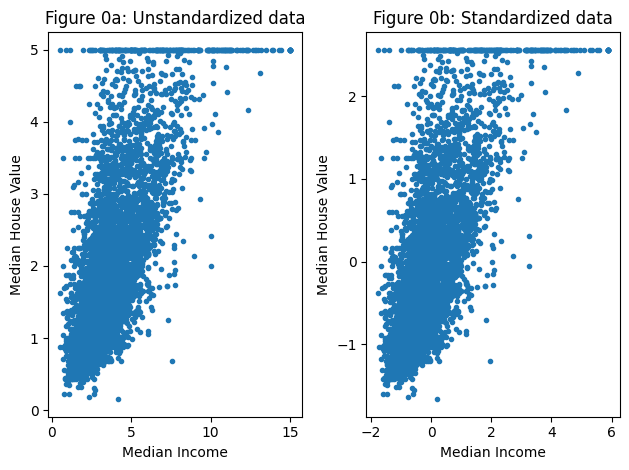

In [385]:
# Plot Standardized vs Unstandardized data
#plt.title('Figures 1 and 2: Standardized vs Unstandardized data')
x1 = x_train_5k
x2 = x_train_5k_stand
y1 = y_train_5k
y2 = y_train_5k_stand
plt.subplot(1, 2, 1)
plt.title('Figure 0a: Unstandardized data')
plt.plot(x1, y1, '.')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.subplot(1, 2, 2)
plt.plot(x2, y2, '.')
plt.title('Figure 0b: Standardized data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

##Problem 2, Task 1##

In [386]:
# Create Radius Function
def radius_predict(x_train, y_train, x_test, C):
  x_predict_array = np.empty((0, ))
  for outer_item in x_test:
    radius_count = 0
    x_train_subtotal = 0
    for inner_item in x_train:
      if np.absolute(inner_item - outer_item) <= C:
        radius_count = radius_count + 1
        x_train_subtotal = x_train_subtotal + inner_item
    if radius_count != 0:
      x_predict = x_train_subtotal / radius_count
    else:
      x_predict = np.mean(y_train)
    x_predict_array = np.append(x_predict_array, x_predict)
  return x_predict_array

## Problem 2, Task 2##

In [387]:
# Calculate predicted x_train sets for different C values. Took roughly 30 seconds to run radius_predict function, so 8 times should be ~ 4minutes (last run 4 minutes, 6 seconds)
x_test_pred_Cp001 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 0.001)
x_test_pred_Cp01 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 0.01)
x_test_pred_Cp1 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 0.1)
x_test_pred_C1 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 1)
x_test_pred_C2 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 2)
x_test_pred_C3 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 3)
x_test_pred_C4 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 4)
x_test_pred_C5 = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 5)


In [388]:
# calculate MSE-test for predictions (actual-predicted)
# looks like we're going to do a lot of MSE, so I'm creating a function for it.
def MSE_calc(y_test, x_test_pred):
  total_values = len(y_test)
  MSE_test = np.sum(np.square(np.subtract(y_test, x_test_pred)))/total_values
  return MSE_test
MSE_test_5k_Cp001 = MSE_calc(y_test_5k_stand, x_test_pred_Cp001)
MSE_test_5k_Cp01 = MSE_calc(y_test_5k_stand, x_test_pred_Cp01)
MSE_test_5k_Cp1 = MSE_calc(y_test_5k_stand, x_test_pred_Cp1)
MSE_test_5k_C1 = MSE_calc(y_test_5k_stand, x_test_pred_C1)
MSE_test_5k_C2 = MSE_calc(y_test_5k_stand, x_test_pred_C2)
MSE_test_5k_C3 = MSE_calc(y_test_5k_stand, x_test_pred_C3)
MSE_test_5k_C4 = MSE_calc(y_test_5k_stand, x_test_pred_C4)
MSE_test_5k_C5 = MSE_calc(y_test_5k_stand, x_test_pred_C5)

## Problem 2, Task 3##

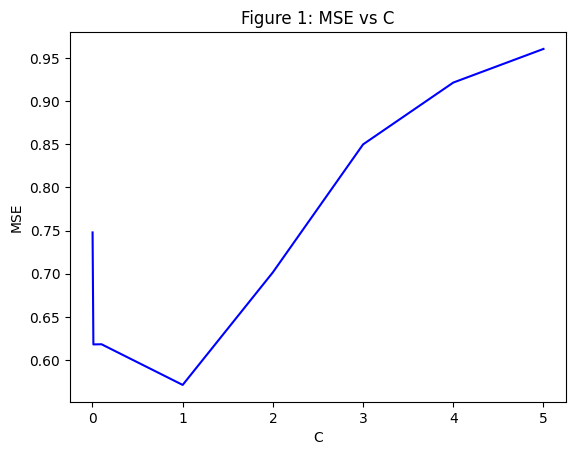

In [389]:
# Plot MSE results
x_c_values  = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5]
y_c_mse = [MSE_test_5k_Cp001, MSE_test_5k_Cp01, MSE_test_5k_Cp1, MSE_test_5k_C1, MSE_test_5k_C2, MSE_test_5k_C3, MSE_test_5k_C4, MSE_test_5k_C5]
plt.plot(x_c_values, y_c_mse, color='blue', linestyle='-')
plt.title('Figure 1: MSE vs C')
plt.xlabel('C')
plt.ylabel('MSE')
plt.show()

## Problem 2, Task 4##

In [390]:
# Calculate predicted x_train sets with fixed C (0.01) and different training set sizes
# In P1,T1 calculated training sizes of 1K, 5K, and 10K.  Need 2,3,4,6,7,8,and 9K.  The following are those calculations
x_train_2k, x_test_2k, y_train_2k, y_test_2k = splitData(housing_df_medinc, housing_df_target, 2000)
x_train_3k, x_test_3k, y_train_3k, y_test_3k = splitData(housing_df_medinc, housing_df_target, 3000)
x_train_4k, x_test_4k, y_train_4k, y_test_4k = splitData(housing_df_medinc, housing_df_target, 4000)
x_train_6k, x_test_6k, y_train_6k, y_test_6k = splitData(housing_df_medinc, housing_df_target, 6000)
x_train_7k, x_test_7k, y_train_7k, y_test_7k = splitData(housing_df_medinc, housing_df_target, 7000)
x_train_8k, x_test_8k, y_train_8k, y_test_8k = splitData(housing_df_medinc, housing_df_target, 8000)
x_train_9k, x_test_9k, y_train_9k, y_test_9k = splitData(housing_df_medinc, housing_df_target, 9000)


In [391]:
# confirm again that training is all uniformly shuffled
print(housing_df_medinc[0])
print(x_train_1k[0])
print(x_train_2k[0])
print(x_train_3k[0])
print(x_train_4k[0])
print(x_train_5k[0])
print(x_train_6k[0])
print(x_train_7k[0])
print(x_train_8k[0])
print(x_train_9k[0])
print(x_train_10k[0])
print(housing_df_medinc[741])
print(x_train_1k[741])
print(x_train_2k[741])
print(x_train_3k[741])
print(x_train_4k[741])
print(x_train_5k[741])
print(x_train_6k[741])
print(x_train_7k[741])
print(x_train_8k[741])
print(x_train_9k[741])
print(x_train_10k[741])

8.3252
1.6812
1.6812
1.6812
1.6812
1.6812
1.6812
1.6812
1.6812
1.6812
1.6812
3.9395
3.5562
3.5562
3.5562
3.5562
3.5562
3.5562
3.5562
3.5562
3.5562
3.5562


In [392]:
# Standardize Data, need all but 5k data
_, _, x_train_1k_stand = standardize(x_train_1k)
_, _, y_train_1k_stand = standardize(y_train_1k)
_, _, x_test_1k_stand = standardize(x_test_1k)

_, _, x_train_2k_stand = standardize(x_train_2k)
_, _, y_train_2k_stand = standardize(y_train_2k)
_, _, x_test_2k_stand = standardize(x_test_2k)

_, _, x_train_3k_stand = standardize(x_train_3k)
_, _, y_train_3k_stand = standardize(y_train_3k)
_, _, x_test_3k_stand = standardize(x_test_3k)

_, _, x_train_4k_stand = standardize(x_train_4k)
_, _, y_train_4k_stand = standardize(y_train_4k)
_, _, x_test_4k_stand = standardize(x_test_4k)

_, _, x_train_6k_stand = standardize(x_train_6k)
_, _, y_train_6k_stand = standardize(y_train_6k)
_, _, x_test_6k_stand = standardize(x_test_6k)

_, _, x_train_7k_stand = standardize(x_train_7k)
_, _, y_train_7k_stand = standardize(y_train_7k)
_, _, x_test_7k_stand = standardize(x_test_7k)

_, _, x_train_8k_stand = standardize(x_train_8k)
_, _, y_train_8k_stand = standardize(y_train_8k)
_, _, x_test_8k_stand = standardize(x_test_8k)

_, _, x_train_9k_stand = standardize(x_train_9k)
_, _, y_train_9k_stand = standardize(y_train_9k)
_, _, x_test_9k_stand = standardize(x_test_9k)

_, _, x_train_10k_stand = standardize(x_train_10k)
_, _, y_train_10k_stand = standardize(y_train_10k)
_, _, x_test_10k_stand = standardize(x_test_10k)



In [393]:
# Calculate predicted x_train sets for fixed C value = 0.1,  Should take something like 5 minutes to run (actual time 5min 25 sec)
x_test_pred_Cp1_1k = radius_predict(x_train_1k_stand, y_train_1k_stand, x_test_1k_stand, 0.1)
x_test_pred_Cp1_2k = radius_predict(x_train_2k_stand, y_train_2k_stand, x_test_2k_stand, 0.1)
x_test_pred_Cp1_3k = radius_predict(x_train_3k_stand, y_train_3k_stand, x_test_3k_stand, 0.1)
x_test_pred_Cp1_4k = radius_predict(x_train_4k_stand, y_train_4k_stand, x_test_4k_stand, 0.1)
x_test_pred_Cp1_5k = radius_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 0.1)
x_test_pred_Cp1_6k = radius_predict(x_train_6k_stand, y_train_6k_stand, x_test_6k_stand, 0.1)
x_test_pred_Cp1_7k = radius_predict(x_train_7k_stand, y_train_7k_stand, x_test_7k_stand, 0.1)
x_test_pred_Cp1_8k = radius_predict(x_train_8k_stand, y_train_8k_stand, x_test_8k_stand, 0.1)
x_test_pred_Cp1_9k = radius_predict(x_train_9k_stand, y_train_9k_stand, x_test_9k_stand, 0.1)
x_test_pred_Cp1_10k = radius_predict(x_train_10k_stand, y_train_10k_stand, x_test_10k_stand, 0.1)


In [394]:
# Standardize the test targets (y_test) for all sets
_, _, y_test_1k_stand = standardize(y_test_1k)
_, _, y_test_2k_stand = standardize(y_test_2k)
_, _, y_test_3k_stand = standardize(y_test_3k)
_, _, y_test_4k_stand = standardize(y_test_4k)
_, _, y_test_5k_stand = standardize(y_test_5k)
_, _, y_test_6k_stand = standardize(y_test_6k)
_, _, y_test_7k_stand = standardize(y_test_7k)
_, _, y_test_8k_stand = standardize(y_test_8k)
_, _, y_test_9k_stand = standardize(y_test_9k)
_, _, y_test_10k_stand = standardize(y_test_10k)

In [397]:
#Calculate MSE for the above
MSE_test_1k_Cp1 = MSE_calc(y_test_1k_stand, x_test_pred_Cp1_1k)
MSE_test_2k_Cp1 = MSE_calc(y_test_2k_stand, x_test_pred_Cp1_2k)
MSE_test_3k_Cp1 = MSE_calc(y_test_3k_stand, x_test_pred_Cp1_3k)
MSE_test_4k_Cp1 = MSE_calc(y_test_4k_stand, x_test_pred_Cp1_4k)
MSE_test_5k_Cp1 = MSE_calc(y_test_5k_stand, x_test_pred_Cp1_5k)
MSE_test_6k_Cp1 = MSE_calc(y_test_6k_stand, x_test_pred_Cp1_6k)
MSE_test_7k_Cp1 = MSE_calc(y_test_7k_stand, x_test_pred_Cp1_7k)
MSE_test_8k_Cp1 = MSE_calc(y_test_8k_stand, x_test_pred_Cp1_8k)
MSE_test_9k_Cp1 = MSE_calc(y_test_9k_stand, x_test_pred_Cp1_9k)
MSE_test_10k_Cp1 = MSE_calc(y_test_10k_stand, x_test_pred_Cp1_10k)

##Problem 2, Task 5##

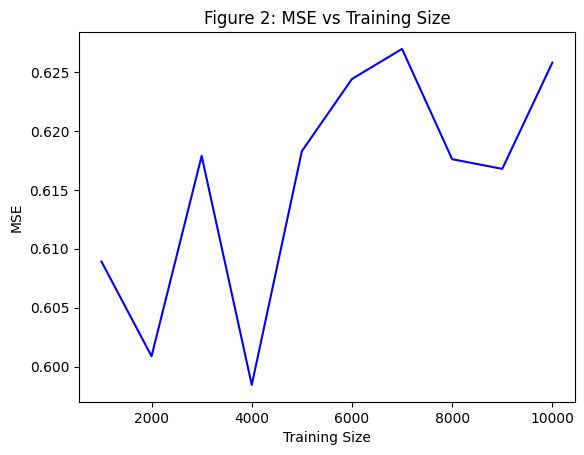

In [398]:
# Plotting based on MSE
x_tsize_values  = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
y_tsize_mse = [MSE_test_1k_Cp1, MSE_test_2k_Cp1, MSE_test_3k_Cp1, MSE_test_4k_Cp1, MSE_test_5k_Cp1, MSE_test_6k_Cp1, MSE_test_7k_Cp1, MSE_test_8k_Cp1, MSE_test_9k_Cp1, MSE_test_10k_Cp1]
plt.plot(x_tsize_values, y_tsize_mse, color='blue', linestyle='-')
plt.title('Figure 2: MSE vs Training Size')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.show()

##Problem 2, Task 6##

Discussion for Figures 1 and 2

In figure 1, the MSE initially drops as C increases and then steadily rises as C gets larger. C = 1 has the smallest MSE.  What is happening is that initially there is not enough datapoints in the radius C to make a good estimation. Eventually, C gets so large that the datapoints used for the estimate are no longer very similar to the input.  This is sometimes known as the curse of dimensionality. In figure 2, the graph appears to jump up and down a lot, however, this is a function of the graph scale.  The MSE is between something slightly less than 0.60 and 0.625.  This remains better than almost all of the other C values we saw in Figure 1.  Still, intuitively you would expect that the MSE would decrease as datapoints increased and that is not the case here. Even though we have more datapoints, they are simply not dense enough to be inside our radius of C = 0.1 and therefore are not changing the overall MSE.

##Problem 3, Task 1##

In [399]:
def knn_predict(x_train, y_train, x_test, K):
    # convert all inputs to NumPy arrays for clean indexing
    x_train = np.array(x_train).flatten()
    y_train = np.array(y_train).flatten()
    x_test = np.array(x_test).flatten()

    x_predict_array = []

    n_train = len(x_train)

    for x_test_val in x_test:
        x_delta = np.abs(x_train - x_test_val)
        neighbor_indices = np.argsort(x_delta)[:min(K, n_train)]

        # average the y values of the nearest neighbors
        y_neighbors = y_train[neighbor_indices]
        x_predict = np.mean(y_neighbors)

        x_predict_array.append(x_predict)

    return np.array(x_predict_array)


##Problem 3, Task 2 ##

In [400]:
# Predict varying values of K, training fixed at 5000,  takes forever.  Last one alone ran for 30 minutes
knn_x_predict_5k_keq1 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 1)
knn_x_predict_5k_keq3 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 3)
knn_x_predict_5k_keq5 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 5)
knn_x_predict_5k_keq10 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 10)
knn_x_predict_5k_keq20 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 20)
knn_x_predict_5k_keq50 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 50)
knn_x_predict_5k_keq100 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 100)
knn_x_predict_5k_keq500 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 500)
knn_x_predict_5k_keq1000 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_5k_stand, 1000)

In [401]:
# Calculate MSE
MSE_test_5k_keq1 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq1)
MSE_test_5k_keq3 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq3)
MSE_test_5k_keq5 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq5)
MSE_test_5k_keq10 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq10)
MSE_test_5k_keq20 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq20)
MSE_test_5k_keq50 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq50)
MSE_test_5k_keq100 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq100)
MSE_test_5k_keq500 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq500)
MSE_test_5k_keq1000 = MSE_calc(y_test_5k_stand, knn_x_predict_5k_keq1000)

##Problem 3, Task 3##


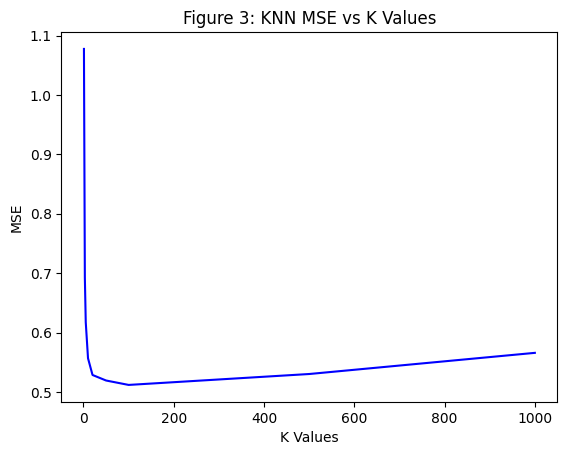

In [402]:
#Plot KNN MSE
x_ktsize_values  = [1,3,5,10,20,50,100,500,1000]
#x_ktsize_values  = [1,3,5,10,20]
#y values for everything
y_ktsize_mse = [MSE_test_5k_keq1, MSE_test_5k_keq3, MSE_test_5k_keq5, MSE_test_5k_keq10, MSE_test_5k_keq20, MSE_test_5k_keq50, MSE_test_5k_keq100, MSE_test_5k_keq500, MSE_test_5k_keq1000]
# truncated y values list
#y_ktsize_mse = [MSE_test_5k_keq1, MSE_test_5k_keq3, MSE_test_5k_keq5, MSE_test_5k_keq10, MSE_test_5k_keq20]
plt.plot(x_ktsize_values, y_ktsize_mse, color='blue', linestyle='-')
plt.title('Figure 3: KNN MSE vs K Values')
plt.xlabel('K Values')
plt.ylabel('MSE')
plt.show()

##Problem 3, Task 4##

In [403]:
# Calculate additional kNN predictions, K=100, fixed test set for 10K This is also going to take a while, commented out for now.
knn_x_predict_1k_keq100 = knn_predict(x_train_1k_stand, y_train_1k_stand, x_test_10k_stand, 100)
knn_x_predict_2k_keq100 = knn_predict(x_train_2k_stand, y_train_2k_stand, x_test_10k_stand, 100)
knn_x_predict_3k_keq100 = knn_predict(x_train_3k_stand, y_train_3k_stand, x_test_10k_stand, 100)
knn_x_predict_4k_keq100 = knn_predict(x_train_4k_stand, y_train_4k_stand, x_test_10k_stand, 100)
knn_x_predict_5k_keq100 = knn_predict(x_train_5k_stand, y_train_5k_stand, x_test_10k_stand, 100)
knn_x_predict_6k_keq100 = knn_predict(x_train_6k_stand, y_train_6k_stand, x_test_10k_stand, 100)
knn_x_predict_7k_keq100 = knn_predict(x_train_7k_stand, y_train_7k_stand, x_test_10k_stand, 100)
knn_x_predict_8k_keq100 = knn_predict(x_train_8k_stand, y_train_8k_stand, x_test_10k_stand, 100)
knn_x_predict_9k_keq100 = knn_predict(x_train_9k_stand, y_train_9k_stand, x_test_10k_stand, 100)
knn_x_predict_10k_keq100 = knn_predict(x_train_10k_stand, y_train_10k_stand, x_test_10k_stand, 100)

In [404]:
#Calculate MSE for kNN predictions with K=100
MSE_test_1k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_1k_keq100)
MSE_test_2k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_2k_keq100)
MSE_test_3k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_3k_keq100)
MSE_test_4k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_4k_keq100)
MSE_test_5k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_5k_keq100)
MSE_test_6k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_6k_keq100)
MSE_test_7k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_7k_keq100)
MSE_test_8k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_8k_keq100)
MSE_test_9k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_9k_keq100)
MSE_test_10k_keq100 = MSE_calc(y_test_10k_stand, knn_x_predict_10k_keq100)

##Problem 3, Task 5

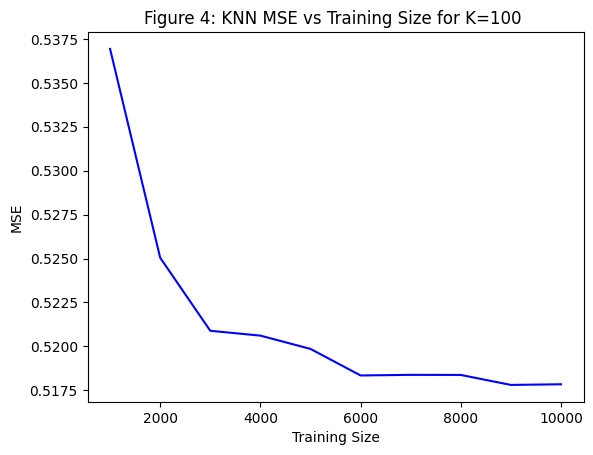

In [405]:
#Plot KNN MSE for different training set sizes
x_tsizek_values  = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
#y values for everything
y_tsizek_mse = [MSE_test_1k_keq100, MSE_test_2k_keq100, MSE_test_3k_keq100, MSE_test_4k_keq100, MSE_test_5k_keq100, MSE_test_6k_keq100, MSE_test_7k_keq100, MSE_test_8k_keq100, MSE_test_9k_keq100, MSE_test_10k_keq100]
plt.plot(x_tsizek_values, y_tsizek_mse, color='blue', linestyle='-')
plt.title('Figure 4: KNN MSE vs Training Size for K=100 ')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.show()

##Problem 3, Task 6##

Discussion for Figures 3 and 4

In Figure 3, we see a step drop in testing MSE initially as K increases and then a gradual increase as K gets larger and larger. Ideal K is likely around 20.  This reflects that a very small number for K does not include enough data to form a good assumption and as K gets much larger it starts to include points that are not relevant for the estimation and error increases.  In figure 4, we see that testing MSE drops as the size of the training set gets larger.  The slope of the decrease becomes smaller at the high number of datapoints in the training set suggesting that there is not much additional information being gained at that scale.  

Overall, the testing MSE is lower for the KNN method than the radius-based regression.  Nearest Neighbors and Radius-based regression are similar in that they are searching for points close to an input point. Perhaps if we had found a radius that included roughly 20 datapoints (like K=20) the MSE would have been similar, however, that was not one of the results we obtained.

##Problem 4, Task 1##

In [406]:
def poly_features(x, degree):
  #x = x.to_numpy().flatten()
  #x = x.flatten() #1D array
  X_poly = np.vstack([x**k for k in range(degree + 1)]) #looping over the given degrees and raising x to the power of deg+1

  means = []
  stds = []

  for k in range(1, degree + 1): #loop through the deg minus the first degree of 1 (the bias)
    mean_k, std_k, standardized_row = standardize(X_poly[k, :]) #standardize each row of the matrix
    X_poly[k, :] = standardized_row
    means.append(mean_k)
    stds.append(std_k)

  return X_poly, means, stds



##Problem 4, Task 2##

In [407]:
def solve_LS(X_poly, y):
    # SVD on X: X = UΣVᵗ
    U, S, Vt = np.linalg.svd(X_poly, full_matrices=False)

    # Compute pseudo-inverse: VΣ⁻¹Uᵗ
    S_inv = np.diag(1 / S) #sigma inverse

    #X_poly = U * Σ * Vᵗ

    #w = V * Σ⁻¹ * Uᵗ * y

    w = Vt.T @ S_inv @ U.T @ y

    return w




##Problem 4, Task 3##

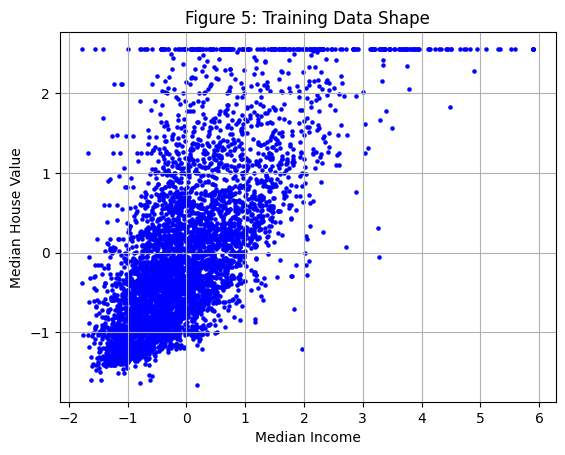

In [408]:
x_mean, x_std, std_x_train = standardize(x_train_5k)
y_mean, y_std, std_y_train = standardize(y_train_5k)

plt.scatter(std_x_train, std_y_train, color='blue', s=5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Figure 5: Training Data Shape")
plt.grid(True)
plt.show()


##Problem 4, Task 4##

In [409]:
degrees = [1, 2, 3, 4, 5, 10, 15, 20]
train_mses = []
test_mses = []

for i in degrees:
    # Build training features
    X_poly_train, X_mean, X_std = poly_features(x_train_5k, i)

    #Transpose to shape (n, d+1)
    X_poly_train_T = X_poly_train.T

    # Train the model
    w = solve_LS(X_poly_train_T, y_train_5k)

    # Build test features
    X_poly_test = np.vstack([x_test_5k.flatten() ** k for k in range(i + 1)])

    # Standardize test features
    for k in range(1, i + 1):
        X_poly_test[k, :] = (X_poly_test[k, :] - X_mean[k - 1]) / X_std[k - 1]

    # Predict
    y_train_pred = X_poly_train.T @ w
    y_test_pred = X_poly_test.T @ w

    # Compute MSE
    train_mse = np.mean((y_train_pred - y_train_5k) ** 2)
    test_mse = np.mean((y_test_pred - y_test_5k) ** 2)

    train_mses.append(train_mse)
    test_mses.append(test_mse)


In [410]:
print("Train MSEs:", train_mses)
print("Test MSEs:", test_mses)


Train MSEs: [np.float64(0.6994313550512113), np.float64(0.6931756942474143), np.float64(0.6869931704472698), np.float64(0.6868606917399146), np.float64(0.6867304332278381), np.float64(0.6814556371462794), np.float64(0.6807519720263495), np.float64(0.6805381534974302)]
Test MSEs: [np.float64(0.7009884573521762), np.float64(0.6930778408313748), np.float64(0.6815419370999962), np.float64(0.6811869950823267), np.float64(0.6818668281011436), np.float64(0.6785454583754157), np.float64(0.6790354078090968), np.float64(0.6792708651783517)]


In [411]:
for i in range(len(degrees)):
    print(f"Degree {degrees[i]} → Train MSE: {train_mses[i]:.4f}, Test MSE: {test_mses[i]:.4f}")


Degree 1 → Train MSE: 0.6994, Test MSE: 0.7010
Degree 2 → Train MSE: 0.6932, Test MSE: 0.6931
Degree 3 → Train MSE: 0.6870, Test MSE: 0.6815
Degree 4 → Train MSE: 0.6869, Test MSE: 0.6812
Degree 5 → Train MSE: 0.6867, Test MSE: 0.6819
Degree 10 → Train MSE: 0.6815, Test MSE: 0.6785
Degree 15 → Train MSE: 0.6808, Test MSE: 0.6790
Degree 20 → Train MSE: 0.6805, Test MSE: 0.6793


##Problem 4, Task 5##

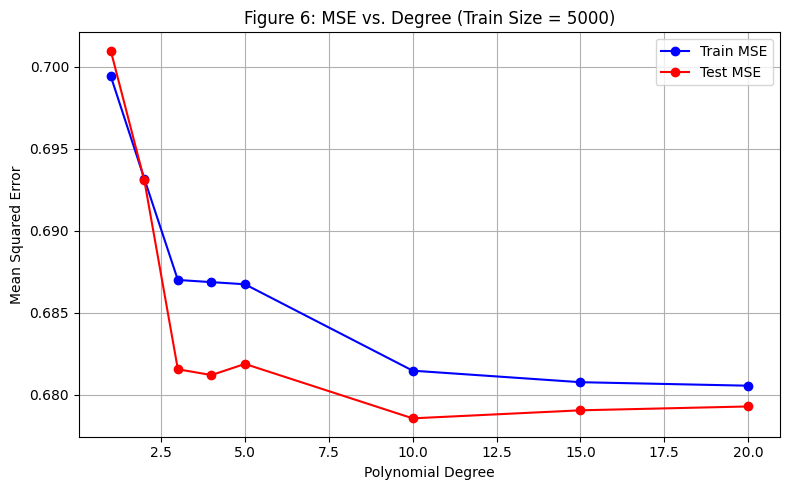

In [412]:
degrees = [1, 2, 3, 4, 5, 10, 15, 20]

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mses, marker='o', color='blue', label='Train MSE')
plt.plot(degrees, test_mses, marker='o', color='red', label='Test MSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Figure 6: MSE vs. Degree (Train Size = 5000)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Problem 4, Task 6##


In [413]:
np.random.seed(42)
indices = np.random.permutation(len(housing_df_medinc))

x_all = housing_df_medinc.iloc[indices]
y_all = housing_df_target.iloc[indices]

x_train_full = x_all[:10000]
y_train_full = y_all[:10000]

x_test_5k = x_all[10000:15000]
y_test_5k = y_all[10000:15000]


train_sizes = [1000, 3000, 5000, 7000, 10000]
train_mses = []
test_mses = []

for size in train_sizes:
    x_train = x_train_full[:size]
    y_train = y_train_full[:size]

    X_poly_train, means, stds = poly_features(x_train, degree=9)
    w = solve_LS(X_poly_train.T, y_train)

    # Build test features (manually standardize)
    x_test = x_test_5k.to_numpy().flatten()
    X_poly_test = np.vstack([x_test ** k for k in range(10)])

    for k in range(1, 10):
        X_poly_test[k, :] = (X_poly_test[k, :] - means[k - 1]) / stds[k - 1]

    y_train_pred = X_poly_train.T @ w
    y_test_pred = X_poly_test.T @ w

    train_mses.append(np.mean((y_train_pred - y_train) ** 2))
    test_mses.append(np.mean((y_test_pred - y_test_5k) ** 2))



##Problem 4, Task 7##

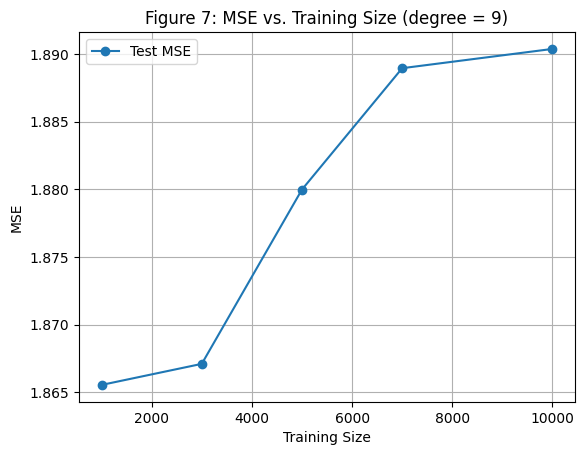

In [414]:
plt.plot(train_sizes, test_mses, marker='o', label="Test MSE")
#plt.plot(train_sizes, train_mses, marker='o', label="Train MSE")
plt.xlabel("Training Size")
plt.ylabel("MSE")
plt.title("Figure 7: MSE vs. Training Size (degree = 9)")
plt.legend()
plt.grid(True)
plt.show()


Discussion for Figure 7

The Testing MSE for Polynomial Regression for degree = 9 starts high and gets much higher as the training size increases.  This is overfitting and suggests that the degree of polynomial is too high for the true function that we are modelling.


In [415]:
# Reset test set index once outside the loop
x_test_5k = x_test_5k.reset_index(drop=True)
y_test_5k = y_test_5k.reset_index(drop=True)

test_mses_knn = []

y_test_5k = y_test_5k.to_numpy().flatten()

for size in train_sizes:
    # Reset indices for sliced training data
    x_train = x_train_full[:size].reset_index(drop=True)
    y_train = y_train_full[:size].reset_index(drop=True)

    # KNN prediction
    y_pred_knn = knn_predict(x_train, y_train, x_test_5k, K=100)
    mse = np.mean((y_pred_knn - y_test_5k)**2)
    test_mses_knn.append(mse)


#test_mses_radius = []

#for size in train_sizes:
#    x_train = x_train_full[:size].reset_index(drop=True)
#    y_train = y_train_full[:size].reset_index(drop=True)

#    y_pred_radius = radius_predict(x_train, y_train, x_test_5k, C=0.1)
#    mse = np.mean((y_pred_radius - y_test_5k) ** 2)
#    test_mses_radius.append(mse)



In [416]:
print(type(y_test_5k))
print(y_test_5k.shape)
print(y_test_5k.columns if isinstance(y_test_5k, pd.DataFrame) else "Not a DataFrame")


<class 'numpy.ndarray'>
(5000,)
Not a DataFrame


In [417]:
test_mses_d3 = []
train_mses_d3 = []

# # # x_test_5k = x_test_5k.flatten()
# # # y_test_5k = y_test_5k.flatten()

# # y_test_5k = np.array(y_test_5k).flatten()

# # # Make sure this is a flat NumPy array
# # if isinstance(y_test_5k, pd.DataFrame):
# #     y_test_5k = y_test_5k.values.flatten()
# # elif isinstance(y_test_5k, pd.Series):
# #     y_test_5k = y_test_5k.to_numpy().flatten()

# y_test_5k = np.array(y_test_5k).flatten()


for size in train_sizes:
    x_train = x_train_full[:size]
    y_train = y_train_full[:size]

    X_poly_train, means, stds = poly_features(x_train, degree=3)
    w = solve_LS(X_poly_train.T, y_train)

    #X_poly_test = np.vstack([x_test_5k.flatten() ** k for k in range(4)])
    X_poly_test = np.vstack([x_test_5k ** k for k in range(4)])
    for k in range(1, 4):
      X_poly_test[k, :] = (X_poly_test[k, :] - means[k - 1]) / stds[k - 1]

    y_train_pred = X_poly_train.T @ w
    y_test_pred = (X_poly_test.T @ w).to_numpy().flatten()

    y_test_pred = y_test_pred.flatten()

    y_test_clean = np.array(y_test_5k).flatten()

    train_mses_d3.append(np.mean((y_train_pred - y_train) ** 2))
    test_mses_d3.append(np.mean((y_test_pred - y_test_clean) ** 2))




In [418]:
print("train_sizes:", len(train_sizes))         #5
print("test_mses_d3:", len(test_mses_d3))       # 5
print("test_mses_knn:", len(test_mses_knn))     #5
#print("test_mses_radius:", len(test_mses_radius)) #5


train_sizes: 5
test_mses_d3: 5
test_mses_knn: 5


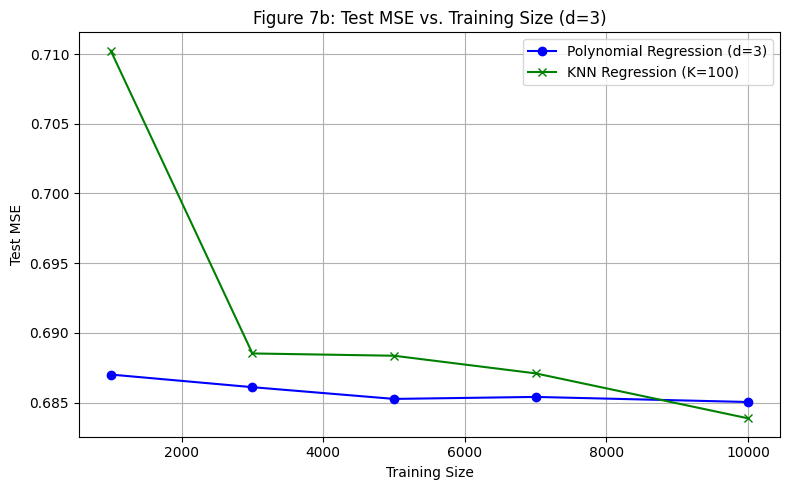

In [419]:
plt.figure(figsize=(8, 5))

plt.plot(train_sizes, test_mses_d3, marker='o', color='blue', label='Polynomial Regression (d=3)')
plt.plot(train_sizes, test_mses_knn, marker='x', color='green', label='KNN Regression (K=100)')
#plt.plot(train_sizes, test_mses_radius, marker='s', color='red', label='Radius Regression (C=0.1)')

plt.xlabel("Training Size")
plt.ylabel("Test MSE")
plt.title("Figure 7b: Test MSE vs. Training Size (d=3)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Problem 4, Task 8##

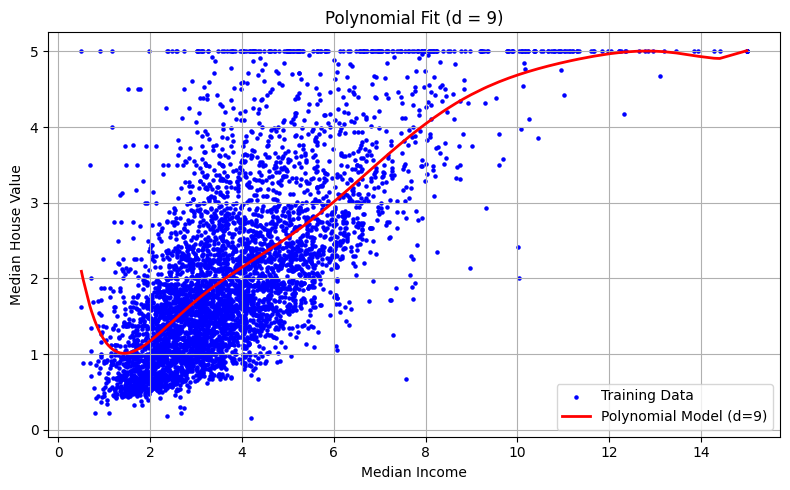

In [420]:
import numpy as np
import matplotlib.pyplot as plt

# Shuffle and slice
np.random.seed(42)
indices = np.random.permutation(len(housing_df_medinc))

x_all = housing_df_medinc[indices]
y_all = housing_df_target.iloc[indices]

x_train_full = x_all[:10000]
y_train_full = y_all[:10000]

# Use only first 5000 for this task
x_train = x_train_full[:5000]
y_train = y_train_full[:5000]

# Train polynomial regression with d=9
degree = 9
X_poly_train, means, stds = poly_features(x_train, degree)
w = solve_LS(X_poly_train.T, y_train)

# Sort x_train for clean plotting

x_sorted_indices = np.argsort(np.array(x_train).flatten())
x_sorted = np.array(x_train).flatten()[x_sorted_indices]

# x_sorted_indices = np.argsort(x_train.flatten())
# x_sorted = x_train.flatten()[x_sorted_indices]

# Rebuild features for sorted x
X_poly_sorted = np.vstack([x_sorted ** k for k in range(degree + 1)])
for k in range(1, degree + 1):
    X_poly_sorted[k, :] = (X_poly_sorted[k, :] - means[k - 1]) / stds[k - 1]

# Predict
y_pred_sorted = X_poly_sorted.T @ w

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, s=5, color='blue', label='Training Data')
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Model (d=9)')

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Polynomial Fit (d = 9)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Problem 4, Task 9##


The training data shows a scattered relationship between median income and house value. As polynomial degree increases, training MSE drops while test MSE eventually flattens or rises slightly, which is overfitting beyond degree 5. Larger training sizes help simple models generalize, but high-degree models like degree 9 perform worse as data increases. Overall, moderate-degree polynomials (around 3–5) balance bias and variance best, outperforming KNN in this case.

##Problem 5, Task 1##

In [421]:
# mount drive location with .csv files
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/ML Class Files/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
FISHDTE.csv  FISHDTR.csv  HW2_A.csv  HW2_xinit.csv  HW2_y.csv


In [422]:
# Load Files
### PROBLEM 5 ###

FISHDTR = "/content/drive/My Drive/Colab Notebooks/ML Class Files/FISHDTR.csv"
FISHDTE = "/content/drive/My Drive/Colab Notebooks/ML Class Files/FISHDTE.csv"
#SYNDTR = "/content/drive/My Drive/Colab Notebooks/ML Class Files/SYNDTR.csv"
#SYNDTE = "/content/drive/My Drive/Colab Notebooks/ML Class Files/SYNDTE.csv"

In [423]:
# Load CSVs
FISHDTR = pd.read_csv(FISHDTR)
FISHDTE = pd.read_csv(FISHDTE)
#SYNDTR = pd.read_csv(SYNDTR)
#SYNDTE = pd.read_csv(SYNDTE)

In [424]:
# Split features from target values, then convert to numpy
TROpd = FISHDTR['weight']
TRIpd = FISHDTR.drop(FISHDTR.columns[-1], axis=1)
TEOpd = FISHDTE['weight']
TEIpd = FISHDTE.drop(FISHDTE.columns[-1], axis=1)

TRO = TROpd.to_numpy()
TRI = (TRIpd.T).to_numpy()
TEI = (TEIpd.T).to_numpy()
TEO = TEOpd.to_numpy()

In [425]:
# Standardize training data
meandrop, stddrop, TRI_width_stand = standardize(TRI[0])
neandrop, stddrop, TRI_length_stand = standardize(TRI[1])
TRI_stand = np.vstack((TRI_width_stand, TRI_length_stand))
meandrop, stddrop, TRO_stand = standardize(TRO)

In [426]:
# We need a slightly tweaked standardize function to standardize the test data with the means/std from training data
def standardize_tst_from_trn(v_trn, v_tst):
  # calculate mean from scratch
  v_length = len(v_trn)
  v_sum = np.sum(v_trn)
  v_mean = v_sum / v_length
  # calculate standard deviation from scratch
  v_diff = v_trn - v_mean
  v_diff_squared = v_diff ** 2
  v_diff_square_sum = np.sum(v_diff_squared)
  v_diff_square_div_by_n = v_diff_square_sum / v_length
  v_stdev = np.sqrt(v_diff_square_div_by_n)
  # standardize each element of v_tst using mean & stdev from trn
  v_stand = (v_tst - v_mean) / v_stdev
  return v_stand

In [427]:
# Standardize test data
TEI_width_stand = standardize_tst_from_trn(TRI[0], TEI[0])
TEI_length_stand = standardize_tst_from_trn(TRI[1], TEI[1])
TEI_stand = np.vstack((TEI_width_stand, TEI_length_stand))
TEO_stand = standardize_tst_from_trn(TRO, TEO)

##Problem 5, Task 2##

In [428]:
# Pearson Correlation Coefficient matrix, create function for calculating the coefficient
def PCC(v1,v2):
  v1mean = np.mean(v1)
  v2mean = np.mean(v2)
  v1diff = v1 - v1mean
  v2diff = v2 - v2mean
  v1v2diffprod = np.multiply(v1diff, v2diff)
  v1v2diffprodsum = np.sum(v1v2diffprod)
  v1diffsq = np.square(v1diff)
  v2diffsq = np.square(v2diff)
  v1diffsqsum = np.sum(v1diffsq)
  v2diffsqsum = np.sum(v2diffsq)
  v1diffsqsumsqrt = np.sqrt(v1diffsqsum)
  v2diffsqsumsqrt = np.sqrt(v2diffsqsum)
  PCCresult = v1v2diffprodsum / (v1diffsqsumsqrt * v2diffsqsumsqrt)
  return PCCresult

In [429]:
# PCC matrix construction
# first column, width correlated with everything
widthwidthcorr = PCC(TRI_stand[0], TRI_stand[0])
widthlengthcorr = PCC(TRI_stand[0], TRI_stand[1])
widthweightcorr = PCC(TRI_stand[0], TRO_stand)

#second column, length correlated with everything
lengthwidthcorr = PCC(TRI_stand[1], TRI_stand[0])
lengthlengthcorr = PCC(TRI_stand[1], TRI_stand[1])
lengthweightcorr = PCC(TRI_stand[1], TRO_stand)

#third column, weight correlated with everything
weightwidthcorr = PCC(TRO_stand, TRI_stand[0])
weightlengthcorr = PCC(TRO_stand, TRI_stand[1])
weightweightcorr = PCC(TRO_stand, TRO_stand)

data = {'width':[widthwidthcorr, widthlengthcorr, widthweightcorr], 'length':[lengthwidthcorr, lengthlengthcorr, lengthweightcorr], 'weight':[weightwidthcorr, weightlengthcorr, weightweightcorr]}
rows = ['width', 'length', 'weight']
PCCmatrix = pd.DataFrame(data, index=rows)
print(PCCmatrix)

           width    length    weight
width   1.000000  0.879754  0.931058
length  0.879754  1.000000  0.899035
weight  0.931058  0.899035  1.000000


Disucssion for Pearson correlation matrix C:

Width with respect to the target output variable, Weight, has a value of 0.931058.  Length with respect to Weight has a value of 0.899035. You can see from the matrix that each item compared to itself (identity) has a correlation of 1.  Because 0.931058 is closer to 1 than 0.899035, width is the input feature most correlated with the output.

##Problem 5, Task 3##

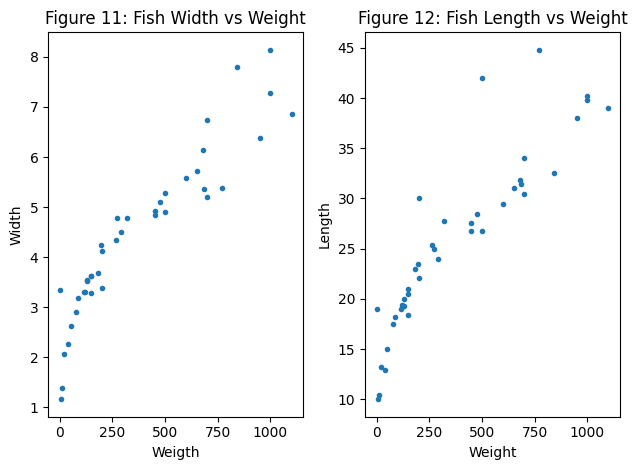

In [430]:
# Plot Fish Input Features versus Output
#plt.title('Figures 11 and 12: Fish Input Features versus Output')
x1 = TRO
x2 = TRO
y1 = TRI[0]
y2 = TRI[1]
plt.subplot(1, 2, 1)
plt.title('Figure 11: Fish Width vs Weight')
plt.plot(x1, y1, '.')
plt.xlabel('Weigth')
plt.ylabel('Width')
plt.subplot(1, 2, 2)
plt.plot(x2, y2, '.')
plt.title('Figure 12: Fish Length vs Weight')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.tight_layout()
plt.show()

##Problem 6, Task 1##

In [431]:
#Build training features for degree 3
TRI_poly, trimean, tristd = poly_features(TRI_stand[0], 3)
#train model, generate weights w
w_tri_poly = solve_LS(TRI_poly.T, TRO_stand)
#Start to build test space.  Create values x = [1,9] with step size 0.001
xtestspace = np.arange(1, 9.001, 0.001)
#Build features for x test space
xtestpoly, xtestpolymean, xtestpolystd = poly_features(xtestspace, 3)
#Standardize x test space
xpolystandtest = xtestpoly
for k in range(1, 4):
   temprow = (xtestpoly[k, :] - xtestpolymean[k - 1]) / xtestpolystd[k - 1]
   xpolystandtest[k] = temprow
_, _, xtestspacestand = standardize(xtestspace)
#Apply predictions to x test
ytestpred = xpolystandtest.T @ w_tri_poly

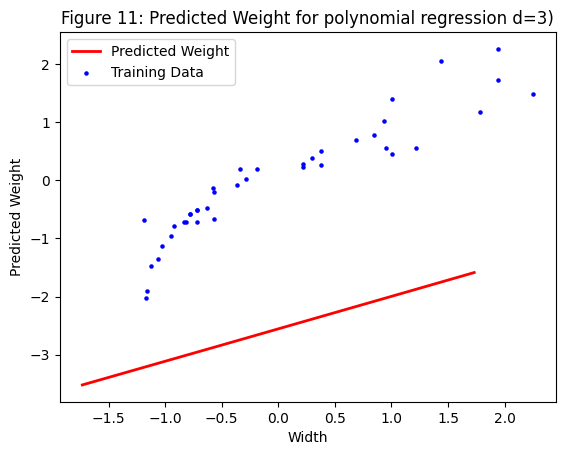

In [432]:
#Plot all of this
plt.plot(xtestspacestand, ytestpred, color='red', linewidth=2, label='Predicted Weight')
plt.scatter(TRO_stand, TRI_stand[0], s=5, color='blue', label='Training Data')
plt.title('Figure 11: Predicted Weight for polynomial regression d=3)')
plt.xlabel('Width')
plt.ylabel('Predicted Weight')
plt.legend()
plt.show()

# Problem 6, Task 2

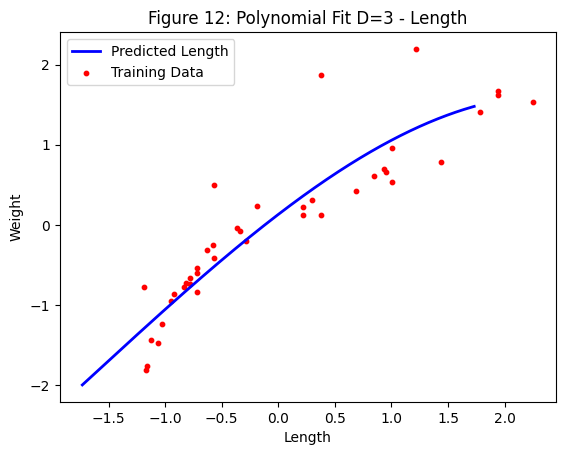

In [433]:
TRI_poly, trimean, tristd = poly_features(TRI_stand[1], 3)
X_dlength = np.arange(1, 60.001, 0.001)
means = [np.mean(TRI_stand[0]), np.mean(TRI_stand[1])]
stds = [np.std(TRI_stand[0]), np.std(TRI_stand[1])]
xstd_length = (xtestspace - means[1])/stds[1]
xtestpoly, xtestpolymean, xtestpolystd = poly_features(xtestspace, 3)
xpolystandtest = xtestpoly
for k in range(1, 4):
   row = X_dlength**k
   _, _, xtestspacestand = standardize(xtestspace)
ytestpred = xpolystandtest.T @ w_tri_poly

plt.plot(xtestspacestand, ytestpred, color= 'blue', linewidth=2, label='Predicted Length')
plt.scatter(TRO_stand, TRI_stand[1], s=10, color='red', label='Training Data')
plt.title('Figure 12: Polynomial Fit D=3 - Length')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()


# Problem 6, Task 3

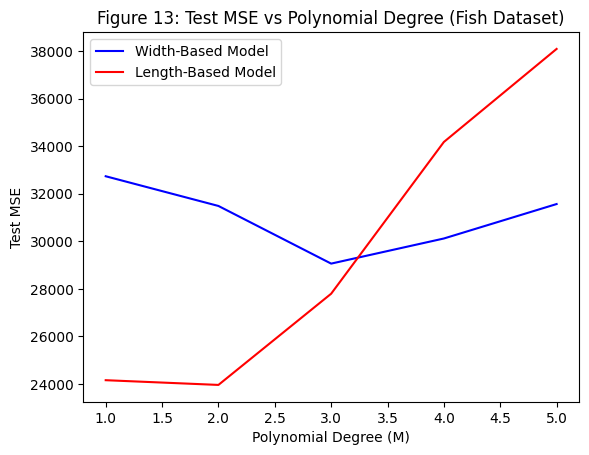

In [434]:
from sklearn.metrics import mean_squared_error
# Extract features and output
TRI = FISHDTR[['width', 'length']].to_numpy().T
TRO = FISHDTR['weight'].to_numpy()
TEI = FISHDTE[['width', 'length']].to_numpy().T
TEO = FISHDTE['weight'].to_numpy()

# Standardization function
def standardize(v, mean=None, std=None):
    if mean is None:
        mean = np.mean(v)
    if std is None:
        std = np.std(v)
    return (v - mean) / std, mean, std

# Polynomial feature constructor
def poly_features(x, degree):
    X_poly = np.vstack([x**d for d in range(degree + 1)])
    means, stds = [], []
    for d in range(1, degree + 1):
        X_poly[d], mean, std = standardize(X_poly[d])
        means.append(mean)
        stds.append(std)
    return X_poly, means, stds

# Solve least squares via SVD
def solve_LS(X_poly, y):
    U, S, VT = np.linalg.svd(X_poly.T, full_matrices=False)
    S_inv = np.diag(1 / S)
    return VT.T @ S_inv @ U.T @ y

# Predict
def predict_poly(X_poly, w):
    return X_poly.T @ w

# Standardize features and outputs
TRI_std = np.zeros_like(TRI)
TEI_std = np.zeros_like(TEI)
means, stds = [], []

for i in range(2):
    TRI_std[i], mean, std = standardize(TRI[i])
    TEI_std[i], _, _ = standardize(TEI[i], mean, std)
    means.append(mean)
    stds.append(std)

TRO_std, y_mean, y_std = standardize(TRO)
TEO_std, _, _ = standardize(TEO, y_mean, y_std)

# Compute test MSE for degrees 1–5 for both width and length
degrees = [1, 2, 3, 4, 5]
mse_width = []
mse_length = []

for d in degrees:
    # Width model
    X_train_w, mean_w, std_w = poly_features(TRI_std[0], d)
    w_w = solve_LS(X_train_w, TRO_std)
    X_test_w, _, _ = poly_features(TEI_std[0], d)
    for k in range(1, d + 1):
        X_test_w[k] = (X_test_w[k] - mean_w[k - 1]) / std_w[k - 1]
    y_pred_w = predict_poly(X_test_w, w_w) * y_std + y_mean
    mse_width.append(mean_squared_error(TEO, y_pred_w))

    # Length model
    X_train_l, mean_l, std_l = poly_features(TRI_std[1], d)
    w_l = solve_LS(X_train_l, TRO_std)
    X_test_l, _, _ = poly_features(TEI_std[1], d)
    for k in range(1, d + 1):
        X_test_l[k] = (X_test_l[k] - mean_l[k - 1]) / std_l[k - 1]
    y_pred_l = predict_poly(X_test_l, w_l) * y_std + y_mean
    mse_length.append(mean_squared_error(TEO, y_pred_l))


# Plot final results for Problem 6 Task 3
plt.plot(degrees, mse_width, color='blue', label='Width-Based Model')
plt.plot(degrees, mse_length, color='red', label='Length-Based Model')
plt.xlabel("Polynomial Degree (M)")
plt.ylabel("Test MSE")
plt.title("Figure 13: Test MSE vs Polynomial Degree (Fish Dataset)")
plt.legend()
plt.show()


Discussion for Figure 14

The MSE for both width and length increase over time.  The scale is off, so it's hard to draw specific conclusions beyond the fact that the length MSE error increases more as the degree of the polynomial regression increases. In the covariance matrix, width was more closely correlated with weigth than length and that may explain why the width rises more slowly than length.

##Problem 7, Task 1##

Explicit Expressions for M = 1, 2, 3, 4

$$
\begin{equation}
 M=1: \alpha_3x + \alpha_2y + \alpha_1
\end{equation}
$$

$$
\begin{equation}
\end{equation}
$$

$$
\begin{equation}
 M=2: \alpha_6x^2 + \alpha_5y^2 + \alpha_4xy + \alpha_3x + \alpha_2y + \alpha_1
\end{equation}
$$

$$
\begin{equation}
\end{equation}
$$

$$
\begin{equation}
 M=3: \alpha_{10}x^3 + \alpha_9y^3 + \alpha_8x^2y + \alpha_7xy^2 + \alpha_6x^2 + \alpha_5y^2 + \alpha_4xy + \alpha_3x + \alpha_2y + \alpha_1
\end{equation}
$$

$$
\begin{equation}
\end{equation}
$$

$$
\begin{equation}
 M=4: \alpha_{15}x^4 + \alpha_{14}y^4 + \alpha_{13}x^3y + \alpha_{12}x^2y^2 + \alpha_{11}xy^3  + \alpha_{10}x^3 + \alpha_9y^3 + \alpha_8x^2y + \alpha_7xy^2 + \alpha_6x^2 + \alpha_5y^2 + \alpha_4xy + \alpha_3x + \alpha_2y + \alpha_1
\end{equation}
$$

##Problem 7, Task 2##

In [435]:
##We need to generate a bivariate poly features.  Update the function from problem 4
def bivar_poly_features(x1, x2, degree):
  cnt = 0
  x1x2_bivar_poly = np.empty((0,1))
  for k in range (degree +1):
    for j in range (degree +1):
      if(k+j <= degree):
        temprow = np.vstack([x1**k * x2**j])
        x1x2_bivar_poly = np.append(x1x2_bivar_poly.reshape(1,-1),temprow)
        cnt = cnt+1
  #reshape into matrix
  inputlength = x1.shape[0]
  x1x2_bivar_poly = x1x2_bivar_poly.reshape(cnt, inputlength)

  means = []
  stds = []

  for k in range(1, cnt): #loop through the deg minus the first degree of 1 (the bias)
    mean_k, std_k, standardized_row = standardize(x1x2_bivar_poly[k, :]) #standardize each row of the matrix
    x1x2_bivar_poly[k, :] = standardized_row
    means.append(mean_k)
    stds.append(std_k)

  return x1x2_bivar_poly, means, stds

In [436]:
#create training features
bivar_poly_d1, bivar_mean_d1, bivar_std_d1 = bivar_poly_features(TRI_stand[0], TRI_stand[1], 1)
bivar_poly_d2, bivar_mean_d2, bivar_std_d2 = bivar_poly_features(TRI_stand[0], TRI_stand[1], 2)
bivar_poly_d3, bivar_mean_d3, bivar_std_d3 = bivar_poly_features(TRI_stand[0], TRI_stand[1], 3)

In [437]:
#train model, generate weights w
w_bivar_d1 = solve_LS(bivar_poly_d1, TRO_stand)
w_bivar_d2 = solve_LS(bivar_poly_d2, TRO_stand)
w_bivar_d3 = solve_LS(bivar_poly_d3, TRO_stand)

In [438]:
#create test features
bivar_poly_test_d1, bivar_mean_test_d1, bivar_std_test_d1 = bivar_poly_features(TEI_stand[0], TEI_stand[1], 1)
bivar_poly_test_d2, bivar_mean_test_d2, bivar_std_test_d2 = bivar_poly_features(TEI_stand[0], TEI_stand[1], 2)
bivar_poly_test_d3, bivar_mean_test_d3, bivar_std_test_d3 = bivar_poly_features(TEI_stand[0], TEI_stand[1], 3)

In [439]:
#apply predictions to train features
y_train_pred_d1 = bivar_poly_d1.T @ w_bivar_d1
y_train_pred_d2 = bivar_poly_d2.T @ w_bivar_d2
y_train_pred_d3 = bivar_poly_d3.T @ w_bivar_d3

In [440]:
#apply predictions to test features
y_test_pred_d1 = bivar_poly_test_d1.T @ w_bivar_d1
y_test_pred_d2 = bivar_poly_test_d2.T @ w_bivar_d2
y_test_pred_d3 = bivar_poly_test_d3.T @ w_bivar_d3

In [441]:
#Train and Test MSE
bivar_train_mse_d1 = MSE_calc(TRO_stand, y_train_pred_d1)
bivar_train_mse_d2 = MSE_calc(TRO_stand, y_train_pred_d2)
bivar_train_mse_d3 = MSE_calc(TRO_stand, y_train_pred_d3)
bivar_test_mse_d1 = MSE_calc(TEO_stand, y_test_pred_d1)
bivar_test_mse_d2 = MSE_calc(TEO_stand, y_test_pred_d2)
bivar_test_mse_d3 = MSE_calc(TEO_stand, y_test_pred_d3)

##Problem 7, Task 3##

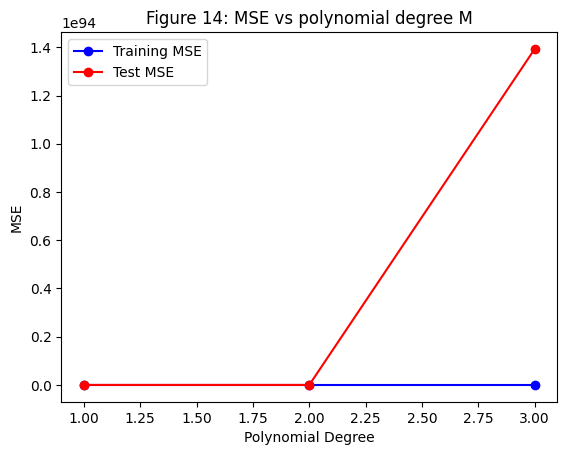

In [442]:
x_axis_degree = np.arange(1, 4, 1)
ytrain_bivar_mse = [bivar_train_mse_d1, bivar_train_mse_d2, bivar_train_mse_d3]
ytest_bivar_mse = [bivar_test_mse_d1, bivar_test_mse_d2, bivar_test_mse_d3]
plt.plot(x_axis_degree, ytrain_bivar_mse, marker='o', color='blue', label='Training MSE')
plt.plot(x_axis_degree, ytest_bivar_mse, marker='o', color='red', label='Test MSE')
plt.title('Figure 14: MSE vs polynomial degree M')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

Discussion for MSE Figure 15

The training MSE constantly decreases as the polynomial degree increases. This makes sense as a higher degree gives the model more flexibility with which to learn all of the data points.

The testing MSE is high at degree=1, decreases significantly at degree=2 and then increases again at degree=2.

Comparing the increase in MSE that is seen on both Figure 14 and Figure 15, the MSE increases noticably after degree 3 in Figure 14 and that would be consistent with what we seen in Figure 15 because test MSE is increasing at degree 3 and there is no expectation that it will decrease again.



## Reference List ##


We utilized current course notes, the "S8 Regression Companion" colab notebook, python/numpy man pages, and online reference material for Polynomial Regression to create this report.